In [1]:
import zipfile
import pandas as pd
import io
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


# Path to the ZIP file
zip_file_path = 'data_YourNextPurchase.zip'

# Dictionary to store DataFrames
dataframes = {}

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP
    file_names = zip_ref.namelist()
    
    # Load CSV files into DataFrames
    for file_name in file_names:
        if file_name.endswith('.csv'):
            with zip_ref.open(file_name) as file:
                # Read the CSV file into a DataFrame
                df_name = file_name.split('/')[-1].split('.')[0]  # Use the file name (without extension) as key
                dataframes[df_name] = pd.read_csv(io.TextIOWrapper(file, encoding='utf-8'))
                
                
# Extract individual dataframes from the dictionary
clients_df = dataframes['clients']
products_df = dataframes['products']
stocks_df = dataframes['stocks']
stores_df = dataframes['stores']
transactions_df = dataframes['transactions']


In [2]:
# Convert date column to datetime format for temporal aggregations
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['SaleTransactionDate'], errors='coerce')

# Filter out invalid ages
clients_df['Age'] = clients_df['Age'].apply(lambda x: x if (15 <= x <= 85) else None)

In [3]:
# Merge transactions with stores data to get store country information
transactions_with_stores = transactions_df.merge(stores_df, on='StoreID', how='left')
print("Shape after merge:", transactions_with_stores.shape)
display(transactions_with_stores.head())

# Merge transactions_with_stores with stocks data
transactions_with_stores_and_stocks = transactions_with_stores.merge(
    stocks_df[['ProductID', 'StoreCountry', 'Quantity']], 
    on=['ProductID', 'StoreCountry'],
    how='left',
    suffixes=('_sold', '_in_stock')
)

print("Shape after merge:", transactions_with_stores_and_stocks.shape)
display(transactions_with_stores_and_stocks.head())

# Merge transactions_with_stores_and_stocks with products data
transactions_complete = transactions_with_stores_and_stocks.merge(
    products_df[['ProductID', 'Category', 'FamilyLevel1', 'FamilyLevel2', 'Universe']], 
    on='ProductID',
    how='left'
)

print("Shape after merge:", transactions_complete.shape)
display(transactions_complete.head())

# Merge transactions_complete with clients data
final_df = transactions_complete.merge(
    clients_df[['ClientID', 'ClientSegment', 'ClientGender', 'Age']], 
    on='ClientID',
    how='left'
)

print("Shape after merge:", final_df.shape)
display(final_df)

Shape after merge: (1177175, 8)


,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity,SalesNetAmountEuro,TransactionDate,StoreCountry
0,8119209481417068505,3532473209579560668,2023-06-06 00:00:00+00:00,4821951108133690356,4,56.97,2023-06-06 00:00:00+00:00,GBR
1,2497726585282787281,5103640511191568912,2023-09-20 00:00:00+00:00,1450109522794525790,1,5.99,2023-09-20 00:00:00+00:00,FRA
2,7673687066317773168,4923931302917549451,2023-12-16 00:00:00+00:00,1821464542701843363,2,16.99,2023-12-16 00:00:00+00:00,ARE
3,1873234305263900608,8502620308847538595,2023-01-31 00:00:00+00:00,2686511472610728845,4,140.97,2023-01-31 00:00:00+00:00,FRA
4,3913817537779196185,8573693021421318503,2024-01-23 00:00:00+00:00,3600233866627167751,1,10.99,2024-01-23 00:00:00+00:00,GBR


Shape after merge: (1177175, 9)


,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity_sold,SalesNetAmountEuro,TransactionDate,StoreCountry,Quantity_in_stock
0,8119209481417068505,3532473209579560668,2023-06-06 00:00:00+00:00,4821951108133690356,4,56.97,2023-06-06 00:00:00+00:00,GBR,NaN
1,2497726585282787281,5103640511191568912,2023-09-20 00:00:00+00:00,1450109522794525790,1,5.99,2023-09-20 00:00:00+00:00,FRA,17.0
2,7673687066317773168,4923931302917549451,2023-12-16 00:00:00+00:00,1821464542701843363,2,16.99,2023-12-16 00:00:00+00:00,ARE,NaN
3,1873234305263900608,8502620308847538595,2023-01-31 00:00:00+00:00,2686511472610728845,4,140.97,2023-01-31 00:00:00+00:00,FRA,NaN
4,3913817537779196185,8573693021421318503,2024-01-23 00:00:00+00:00,3600233866627167751,1,10.99,2024-01-23 00:00:00+00:00,GBR,NaN


Shape after merge: (1177175, 13)


,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity_sold,SalesNetAmountEuro,TransactionDate,StoreCountry,Quantity_in_stock,Category,FamilyLevel1,FamilyLevel2,Universe
0,8119209481417068505,3532473209579560668,2023-06-06 00:00:00+00:00,4821951108133690356,4,56.97,2023-06-06 00:00:00+00:00,GBR,NaN,Rugby,Shorts,Canterbury Advantage,Women
1,2497726585282787281,5103640511191568912,2023-09-20 00:00:00+00:00,1450109522794525790,1,5.99,2023-09-20 00:00:00+00:00,FRA,17.0,Beach,Swimsuit,Speedo Fastskin LZR Racer X,Women
2,7673687066317773168,4923931302917549451,2023-12-16 00:00:00+00:00,1821464542701843363,2,16.99,2023-12-16 00:00:00+00:00,ARE,NaN,Baseball,Bat,Rawlings Quatro Pro,Men
3,1873234305263900608,8502620308847538595,2023-01-31 00:00:00+00:00,2686511472610728845,4,140.97,2023-01-31 00:00:00+00:00,FRA,NaN,Cycling,Bike,Specialized S-Works Roubaix,Men
4,3913817537779196185,8573693021421318503,2024-01-23 00:00:00+00:00,3600233866627167751,1,10.99,2024-01-23 00:00:00+00:00,GBR,NaN,Football,Shoes,Adidas Predator,Men


Shape after merge: (1177175, 16)


,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity_sold,SalesNetAmountEuro,TransactionDate,StoreCountry,Quantity_in_stock,Category,FamilyLevel1,FamilyLevel2,Universe,ClientSegment,ClientGender,Age
0,8119209481417068505,3532473209579560668,2023-06-06 00:00:00+00:00,4821951108133690356,4,56.97,2023-06-06 00:00:00+00:00,GBR,NaN,Rugby,Shorts,Canterbury Advantage,Women,LOYAL,F,NaN
1,2497726585282787281,5103640511191568912,2023-09-20 00:00:00+00:00,1450109522794525790,1,5.99,2023-09-20 00:00:00+00:00,FRA,17.0,Beach,Swimsuit,Speedo Fastskin LZR Racer X,Women,LOYAL,M,39.0
2,7673687066317773168,4923931302917549451,2023-12-16 00:00:00+00:00,1821464542701843363,2,16.99,2023-12-16 00:00:00+00:00,ARE,NaN,Baseball,Bat,Rawlings Quatro Pro,Men,LOYAL,F,NaN
3,1873234305263900608,8502620308847538595,2023-01-31 00:00:00+00:00,2686511472610728845,4,140.97,2023-01-31 00:00:00+00:00,FRA,NaN,Cycling,Bike,Specialized S-Works Roubaix,Men,TOP,M,35.0
4,3913817537779196185,8573693021421318503,2024-01-23 00:00:00+00:00,3600233866627167751,1,10.99,2024-01-23 00:00:00+00:00,GBR,NaN,Football,Shoes,Adidas Predator,Men,LOYAL,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177170,2432651529788024626,8869820367595237769,2023-05-05 00:00:00+00:00,3306498059038628287,2,16.99,2023-05-05 00:00:00+00:00,USA,3.0,Tennis,Ball,Wilson US Open,Women,LOYAL,F,NaN
1177171,1691937543970001915,7039116905723644150,2023-11-12 00:00:00+00:00,3306498059038628287,1,5.99,2023-11-12 00:00:00+00:00,USA,NaN,Cycling,Helmet,Bell Super 3R MIPS,Men,LOYAL,F,NaN
1177172,1003100987571803008,242506609152720728,2024-09-25 00:00:00+00:00,9099531021898466037,1,29.99,2024-09-25 00:00:00+00:00,USA,2.0,Football,Shorts,Nike Dri-FIT,Men,LOYAL,F,36.0
1177173,5201324372064592752,412909163137289630,2025-01-22 00:00:00+00:00,7913334853958149044,2,29.99,2025-01-22 00:00:00+00:00,FRA,3.0,Badminton,Shuttlecock,Yonex AS-30,Men,LOYAL,F,NaN


In [4]:
# Replace NaN values in Quantity_in_stock with 0
final_df['Quantity_in_stock'] = final_df['Quantity_in_stock'].fillna(0)

# Set 'U' gender values to null
final_df.loc[final_df['ClientGender'] == 'U', 'ClientGender'] = None

# Remove 'N' and 'C' values from ClientGender
final_df.loc[final_df['ClientGender'].isin(['N', 'C']), 'ClientGender'] = None

In [5]:
# For each merge operation, let's check which rows didn't get matched

# 1. Check unmatched stores rows
unmatched_stores = stores_df[~stores_df['StoreID'].isin(transactions_df['StoreID'])]
num_unmatched_stores = len(unmatched_stores)
percentage_unmatched_stores = (num_unmatched_stores / len(stores_df)) * 100

print(f"\nNumber of stores not in any transaction: {num_unmatched_stores} ({percentage_unmatched_stores:.2f}%)")
if num_unmatched_stores > 0:
    print("\nExample of unmatched stores:")
    print(unmatched_stores.head())

# 2. Check unmatched stocks rows 
unmatched_stocks = stocks_df[~stocks_df['ProductID'].isin(transactions_df['ProductID'])]
num_unmatched_stocks = len(unmatched_stocks)
percentage_unmatched_stocks = (num_unmatched_stocks / len(stocks_df)) * 100

print(f"\nNumber of stock records with no matching transactions: {num_unmatched_stocks} ({percentage_unmatched_stocks:.2f}%)")
if num_unmatched_stocks > 0:
    print("\nExample of unmatched stocks:")
    print(unmatched_stocks.head())

# 3. Check unmatched products
unmatched_products = products_df[~products_df['ProductID'].isin(transactions_df['ProductID'])]
num_unmatched_products = len(unmatched_products)
percentage_unmatched_products = (num_unmatched_products / len(products_df)) * 100

print(f"\nNumber of products with no transactions: {num_unmatched_products} ({percentage_unmatched_products:.2f}%)")
if num_unmatched_products > 0:
    print("\nExample of unmatched products:")
    print(unmatched_products.head())

# 4. Check unmatched clients
unmatched_clients = clients_df[~clients_df['ClientID'].isin(transactions_df['ClientID'])]
num_unmatched_clients = len(unmatched_clients)
percentage_unmatched_clients = (num_unmatched_clients / len(clients_df)) * 100

print(f"\nNumber of clients with no transactions: {num_unmatched_clients} ({percentage_unmatched_clients:.2f}%)")
if num_unmatched_clients > 0:
    print("\nExample of unmatched clients:")
    print(unmatched_clients.head())


Number of stores not in any transaction: 455 (75.08%)

Example of unmatched stores:
               StoreID StoreCountry
0  7793989562498223120          BRA
1  5301108587679203543          BRA
2  2908896877692945358          BRA
3  2718131790848668199          BRA
4  7819332417840564556          BRA

Number of stock records with no matching transactions: 264 (1.65%)

Example of unmatched stocks:
    StoreCountry            ProductID  Quantity
7            AUS  7723338481459021739       3.0
191          AUS  2454887360203612522       1.0
192          AUS  6596210828396111483       1.0
196          AUS  2555019967478483592       2.0
560          AUS  3077353185423939874       1.0

Number of products with no transactions: 17728 (37.36%)

Example of unmatched products:
                 ProductID    Category FamilyLevel1          FamilyLevel2  \
29730  3704037523527266838  Basketball        Shoes  Nike Air Zoom BB NXT   
29731  6038168350332668241      Tennis         Ball        Wilson US O

In [6]:
# Compute number of transactions and average sales per client from final_df
client_tx_counts = final_df.groupby('ClientID').size()
client_avg_sales = final_df.groupby('ClientID')['SalesNetAmountEuro'].mean()

# Determine the 99.9th percentile thresholds (i.e. top 0.1%)
tx_threshold = np.percentile(client_tx_counts, 99.9)
sales_threshold = np.percentile(client_avg_sales, 99.9)

# Select top clients based on each metric
top_tx_clients = client_tx_counts[client_tx_counts >= tx_threshold].sort_values(ascending=False)
top_avg_sales_clients = client_avg_sales[client_avg_sales >= sales_threshold].sort_values(ascending=False)

print("Top 0.1% clients by number of transactions:")
display(top_tx_clients)

print("Top 0.1% clients by average euros per transaction:")
display(top_avg_sales_clients)

# Create sets from the client lists
high_frequency_clients = set(top_tx_clients.index)
high_amount_clients = set(top_avg_sales_clients.index)

# Print statistics about each set
print(f"Number of high frequency clients: {len(high_frequency_clients)}")
print(f"Number of high amount clients: {len(high_amount_clients)}")

# Find the union of both sets
combined_outlier_clients = high_frequency_clients | high_amount_clients

print(f"\nTotal number of unique outlier clients: {len(combined_outlier_clients)}")
print(f"Clients that appear in both sets: {len(high_frequency_clients & high_amount_clients)}")

Top 0.1% clients by number of transactions:


ClientID
784139077380372687     44460
3956811437678549470     2117
4763912924549386716     1300
2257027309541343162      996
7170141520984547731      971
                       ...  
4471998699039027411      102
4647273138064116363      102
70620376897043536        102
1885781186421853565      102
1528683199865855811      102
Length: 309, dtype: int64

Top 0.1% clients by average euros per transaction:


ClientID
1132261303486551948    16924.546667
1918889904232780836    13015.990000
3468904384835684271     6391.145789
8666581929021561288     4673.990000
5609349892117492319     4208.722667
                           ...     
8364960262383603561      347.970000
6624685886274416175      347.970000
6106980026208860223      347.960000
3800870822352005269      347.960000
4003421382250247894      347.960000
Name: SalesNetAmountEuro, Length: 307, dtype: float64

Number of high frequency clients: 309
Number of high amount clients: 307

Total number of unique outlier clients: 613
Clients that appear in both sets: 3


In [7]:
# Store total number of transactions before filtering
total_transactions_before = len(final_df)

# Remove transactions for clients identified as outliers
# These are clients that exceed either the 99.9th percentile in transaction frequency 
# or in average sales amount
final_df = final_df[~final_df['ClientID'].isin(combined_outlier_clients)]

print(f"Number of transactions before filtering: {total_transactions_before}")
print(f"Number of transactions after filtering: {len(final_df)}")
print(f"Percentage of transactions removed: {((total_transactions_before - len(final_df)) / total_transactions_before * 100):.2f}%")

Number of transactions before filtering: 1177175
Number of transactions after filtering: 1076890
Percentage of transactions removed: 8.52%


In [8]:
# Calculate number of orders per client
orders_per_client = final_df.groupby('ClientID').size()

# Calculate average amount per order per client
avg_amount_per_order = final_df.groupby('ClientID')['SalesNetAmountEuro'].mean()

# Calculate the 99.9 percentile thresholds
freq_threshold = np.percentile(orders_per_client, 99.9)
amount_threshold = np.percentile(avg_amount_per_order, 99.9)

# Identify clients to remove (either high frequency or high average amount)
clients_high_freq = orders_per_client[orders_per_client > freq_threshold].index
clients_high_amount = avg_amount_per_order[avg_amount_per_order > amount_threshold].index
clients_to_remove = set(clients_high_freq) | set(clients_high_amount)

# Remove transactions for these clients from final_df
final_df = final_df[~final_df['ClientID'].isin(clients_to_remove)]

total_clients_before = len(final_df['ClientID'].unique())
total_transactions_before = len(final_df)

print(f"Number of clients removed: {len(clients_to_remove)}")
print(f"Percentage of clients removed: {(len(clients_to_remove) / total_clients_before * 100):.2f}%")
print(f"\nNumber of transactions remaining: {len(final_df)}")
print(f"Number of transactions removed: {total_transactions_before - len(final_df)}")
print(f"Percentage of transactions removed: {((total_transactions_before - len(final_df)) / total_transactions_before * 100):.2f}%")
print(f"\nNumber of unique clients remaining: {final_df['ClientID'].nunique()}")


Number of clients removed: 602
Percentage of clients removed: 0.20%

Number of transactions remaining: 1050845
Number of transactions removed: 0
Percentage of transactions removed: 0.00%

Number of unique clients remaining: 303714


In [9]:
# Check for duplicates and sort them to show together
duplicates = final_df[final_df.duplicated(keep=False)]
duplicates_sorted = duplicates.sort_values(by=['ClientID', 'ProductID', 'TransactionDate', 'StoreID', 'Quantity_sold', 'SalesNetAmountEuro'])
print("Number of duplicate rows:", len(duplicates_sorted))
display(duplicates_sorted.head(10))

Number of duplicate rows: 829


,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity_sold,SalesNetAmountEuro,TransactionDate,StoreCountry,Quantity_in_stock,Category,FamilyLevel1,FamilyLevel2,Universe,ClientSegment,ClientGender,Age
84969,3084334653716062,7725420332614167614,2024-06-16 00:00:00+00:00,5202366601222773915,1,5.99,2024-06-16 00:00:00+00:00,FRA,0.0,Football,Shorts,Nike Dri-FIT,Men,LOYAL,M,NaN
1041344,3084334653716062,7725420332614167614,2024-06-16 00:00:00+00:00,5202366601222773915,1,5.99,2024-06-16 00:00:00+00:00,FRA,0.0,Football,Shorts,Nike Dri-FIT,Men,LOYAL,M,NaN
243566,50349714364142695,2952349511890351743,2024-06-22 00:00:00+00:00,7606867699310848059,1,5.99,2024-06-22 00:00:00+00:00,DEU,0.0,Cycling,Helmet,Bell Super 3R MIPS,Men,LOYAL,F,NaN
1173488,50349714364142695,2952349511890351743,2024-06-22 00:00:00+00:00,7606867699310848059,1,5.99,2024-06-22 00:00:00+00:00,DEU,0.0,Cycling,Helmet,Bell Super 3R MIPS,Men,LOYAL,F,NaN
211169,50349714364142695,8632944867149257358,2024-06-20 00:00:00+00:00,7606867699310848059,1,5.99,2024-06-20 00:00:00+00:00,DEU,0.0,Cycling,Helmet,Kask Protone,Women,LOYAL,F,NaN
1045728,50349714364142695,8632944867149257358,2024-06-20 00:00:00+00:00,7606867699310848059,1,5.99,2024-06-20 00:00:00+00:00,DEU,0.0,Cycling,Helmet,Kask Protone,Women,LOYAL,F,NaN
753403,53104018006861689,3613681608864907517,2024-11-29 00:00:00+00:00,5946653406451604690,2,5.00,2024-11-29 00:00:00+00:00,USA,0.0,Football,Shorts,Nike Dri-FIT,Men,LOYAL,F,NaN
820077,53104018006861689,3613681608864907517,2024-11-29 00:00:00+00:00,5946653406451604690,2,5.00,2024-11-29 00:00:00+00:00,USA,0.0,Football,Shorts,Nike Dri-FIT,Men,LOYAL,F,NaN
414092,84612975874599017,4679812812492781009,2024-07-06 00:00:00+00:00,7606867699310848059,1,5.99,2024-07-06 00:00:00+00:00,DEU,0.0,Basketball,Shoes,Adidas Harden Vol. 4,Women,LOYAL,M,39.0
647734,84612975874599017,4679812812492781009,2024-07-06 00:00:00+00:00,7606867699310848059,1,5.99,2024-07-06 00:00:00+00:00,DEU,0.0,Basketball,Shoes,Adidas Harden Vol. 4,Women,LOYAL,M,39.0


In [12]:
# Group by ProductID and filter groups with different quantities
different_quantities = final_df.groupby('ProductID').filter(lambda x: x['Quantity_sold'].nunique() > 1)

# Pick only 10 groups
sample_groups = different_quantities.groupby('ProductID').head(10)

# Sort by ProductID
sample_groups_sorted = sample_groups.sort_values(by='ProductID')

# Display the result
display(sample_groups_sorted)

,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity_sold,SalesNetAmountEuro,TransactionDate,StoreCountry,Quantity_in_stock,Category,FamilyLevel1,FamilyLevel2,Universe,ClientSegment,ClientGender,Age
39730,9221529454833180533,72931364288678,2024-10-04 00:00:00+00:00,7913334853958149044,2,8.99,2024-10-04 00:00:00+00:00,FRA,3.0,Hockey,Helmet,Bauer RE-AKT,Men,LOYAL,F,NaN
55274,3038910668981554611,72931364288678,2024-11-09 00:00:00+00:00,5888936966417627740,1,14.99,2024-11-09 00:00:00+00:00,FRA,3.0,Hockey,Helmet,Bauer RE-AKT,Men,LOYAL,F,64.0
162179,8216687612760968235,72931364288678,2024-10-22 00:00:00+00:00,3306498059038628287,2,9.99,2024-10-22 00:00:00+00:00,USA,35.0,Hockey,Helmet,Bauer RE-AKT,Men,LOYAL,NaN,NaN
247084,8937347872756903648,72931364288678,2024-09-03 00:00:00+00:00,8462628138647008757,5,35.96,2024-09-03 00:00:00+00:00,USA,35.0,Hockey,Helmet,Bauer RE-AKT,Men,TOP,F,45.0
176146,2489283278190640302,72931364288678,2024-11-10 00:00:00+00:00,1914079338419204266,4,23.97,2024-11-10 00:00:00+00:00,USA,35.0,Hockey,Helmet,Bauer RE-AKT,Men,LOYAL,F,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313568,4459154623860037290,9222852020880136103,2023-06-20 00:00:00+00:00,5202366601222773915,2,11.99,2023-06-20 00:00:00+00:00,FRA,0.0,Beach,Swimsuit,Arena Carbon Air2,Men,LOYAL,F,NaN
313423,6578033551556209220,9222852020880136103,2023-06-18 00:00:00+00:00,5202366601222773915,1,5.99,2023-06-18 00:00:00+00:00,FRA,0.0,Beach,Swimsuit,Arena Carbon Air2,Men,LOYAL,F,37.0
53437,6156262505145089381,9223244269959704092,2024-10-07 00:00:00+00:00,2930007804970135039,3,33.98,2024-10-07 00:00:00+00:00,AUS,0.0,Hockey,Stick,Warrior Alpha DX,Men,LOYAL,F,NaN
194863,6772940133938384383,9223244269959704092,2024-09-09 00:00:00+00:00,6138815706411501953,1,14.99,2024-09-09 00:00:00+00:00,AUS,0.0,Hockey,Stick,Warrior Alpha DX,Men,LOYAL,M,NaN


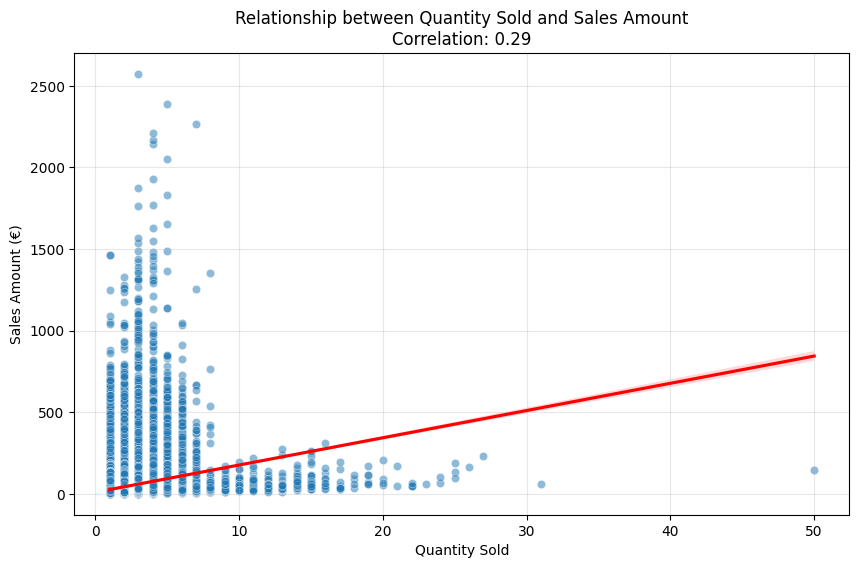

In [15]:
# Create a scatter plot to visualize relationship between Quantity_sold and SalesNetAmountEuro
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_groups_sorted, x='Quantity_sold', y='SalesNetAmountEuro', alpha=0.5)

# Add a regression line
sns.regplot(data=sample_groups_sorted, x='Quantity_sold', y='SalesNetAmountEuro', 
            scatter=False, color='red')

# Calculate correlation coefficient
correlation = sample_groups_sorted['Quantity_sold'].corr(sample_groups_sorted['SalesNetAmountEuro'])

plt.title(f'Relationship between Quantity Sold and Sales Amount\nCorrelation: {correlation:.2f}')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount (€)')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# Aggregate duplicate transactions by summing quantities
final_df = final_df.groupby([
    'ClientID', 'ProductID', 'TransactionDate', 'StoreID', 'SalesNetAmountEuro',
    'StoreCountry', 'Quantity_in_stock', 'Category', 'FamilyLevel1', 'FamilyLevel2',
    'Universe', 'ClientSegment', 'ClientGender', 'Age'
])['Quantity_sold'].sum().reset_index()

In [ ]:
'''# Remove customers from final_df
final_df = final_df[~final_df['ClientID'].isin([784139077380372687, 7170141520984547731, 4948726587055327420])]
'''

"# Remove customers from final_df\nfinal_df = final_df[~final_df['ClientID'].isin([784139077380372687, 7170141520984547731, 4948726587055327420])]\n"

In [ ]:
# Print data info for final_df
print("Final DataFrame Info:")
print(final_df.info())
display(final_df)

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1050845 entries, 0 to 1177174
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   ClientID             1050845 non-null  int64              
 1   ProductID            1050845 non-null  int64              
 2   SaleTransactionDate  1050845 non-null  object             
 3   StoreID              1050845 non-null  int64              
 4   Quantity_sold        1050845 non-null  int64              
 5   SalesNetAmountEuro   1050845 non-null  float64            
 6   TransactionDate      1050845 non-null  datetime64[ns, UTC]
 7   StoreCountry         1050845 non-null  object             
 8   Quantity_in_stock    1050845 non-null  float64            
 9   Category             1050845 non-null  object             
 10  FamilyLevel1         1050845 non-null  object             
 11  FamilyLevel2         1050845 non-

,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity_sold,SalesNetAmountEuro,TransactionDate,StoreCountry,Quantity_in_stock,Category,FamilyLevel1,FamilyLevel2,Universe,ClientSegment,ClientGender,Age
0,8119209481417068505,3532473209579560668,2023-06-06 00:00:00+00:00,4821951108133690356,4,56.97,2023-06-06 00:00:00+00:00,GBR,0.0,Rugby,Shorts,Canterbury Advantage,Women,LOYAL,F,NaN
1,2497726585282787281,5103640511191568912,2023-09-20 00:00:00+00:00,1450109522794525790,1,5.99,2023-09-20 00:00:00+00:00,FRA,17.0,Beach,Swimsuit,Speedo Fastskin LZR Racer X,Women,LOYAL,M,39.0
2,7673687066317773168,4923931302917549451,2023-12-16 00:00:00+00:00,1821464542701843363,2,16.99,2023-12-16 00:00:00+00:00,ARE,0.0,Baseball,Bat,Rawlings Quatro Pro,Men,LOYAL,F,NaN
4,3913817537779196185,8573693021421318503,2024-01-23 00:00:00+00:00,3600233866627167751,1,10.99,2024-01-23 00:00:00+00:00,GBR,0.0,Football,Shoes,Adidas Predator,Men,LOYAL,F,NaN
5,7494961058370710343,3105228928624179,2025-01-24 00:00:00+00:00,5973162337933203520,2,121.99,2025-01-24 00:00:00+00:00,USA,0.0,Handball,Shoes,Asics Gel-Blast,Men,LOYAL,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177169,2560338088209071750,5974374464730714622,2024-09-21 00:00:00+00:00,8056434430249636044,1,3.99,2024-09-21 00:00:00+00:00,USA,0.0,Football,Shoes,Adidas Predator,Women,LOYAL,M,NaN
1177170,2432651529788024626,8869820367595237769,2023-05-05 00:00:00+00:00,3306498059038628287,2,16.99,2023-05-05 00:00:00+00:00,USA,3.0,Tennis,Ball,Wilson US Open,Women,LOYAL,F,NaN
1177172,1003100987571803008,242506609152720728,2024-09-25 00:00:00+00:00,9099531021898466037,1,29.99,2024-09-25 00:00:00+00:00,USA,2.0,Football,Shorts,Nike Dri-FIT,Men,LOYAL,F,36.0
1177173,5201324372064592752,412909163137289630,2025-01-22 00:00:00+00:00,7913334853958149044,2,29.99,2025-01-22 00:00:00+00:00,FRA,3.0,Badminton,Shuttlecock,Yonex AS-30,Men,LOYAL,F,NaN


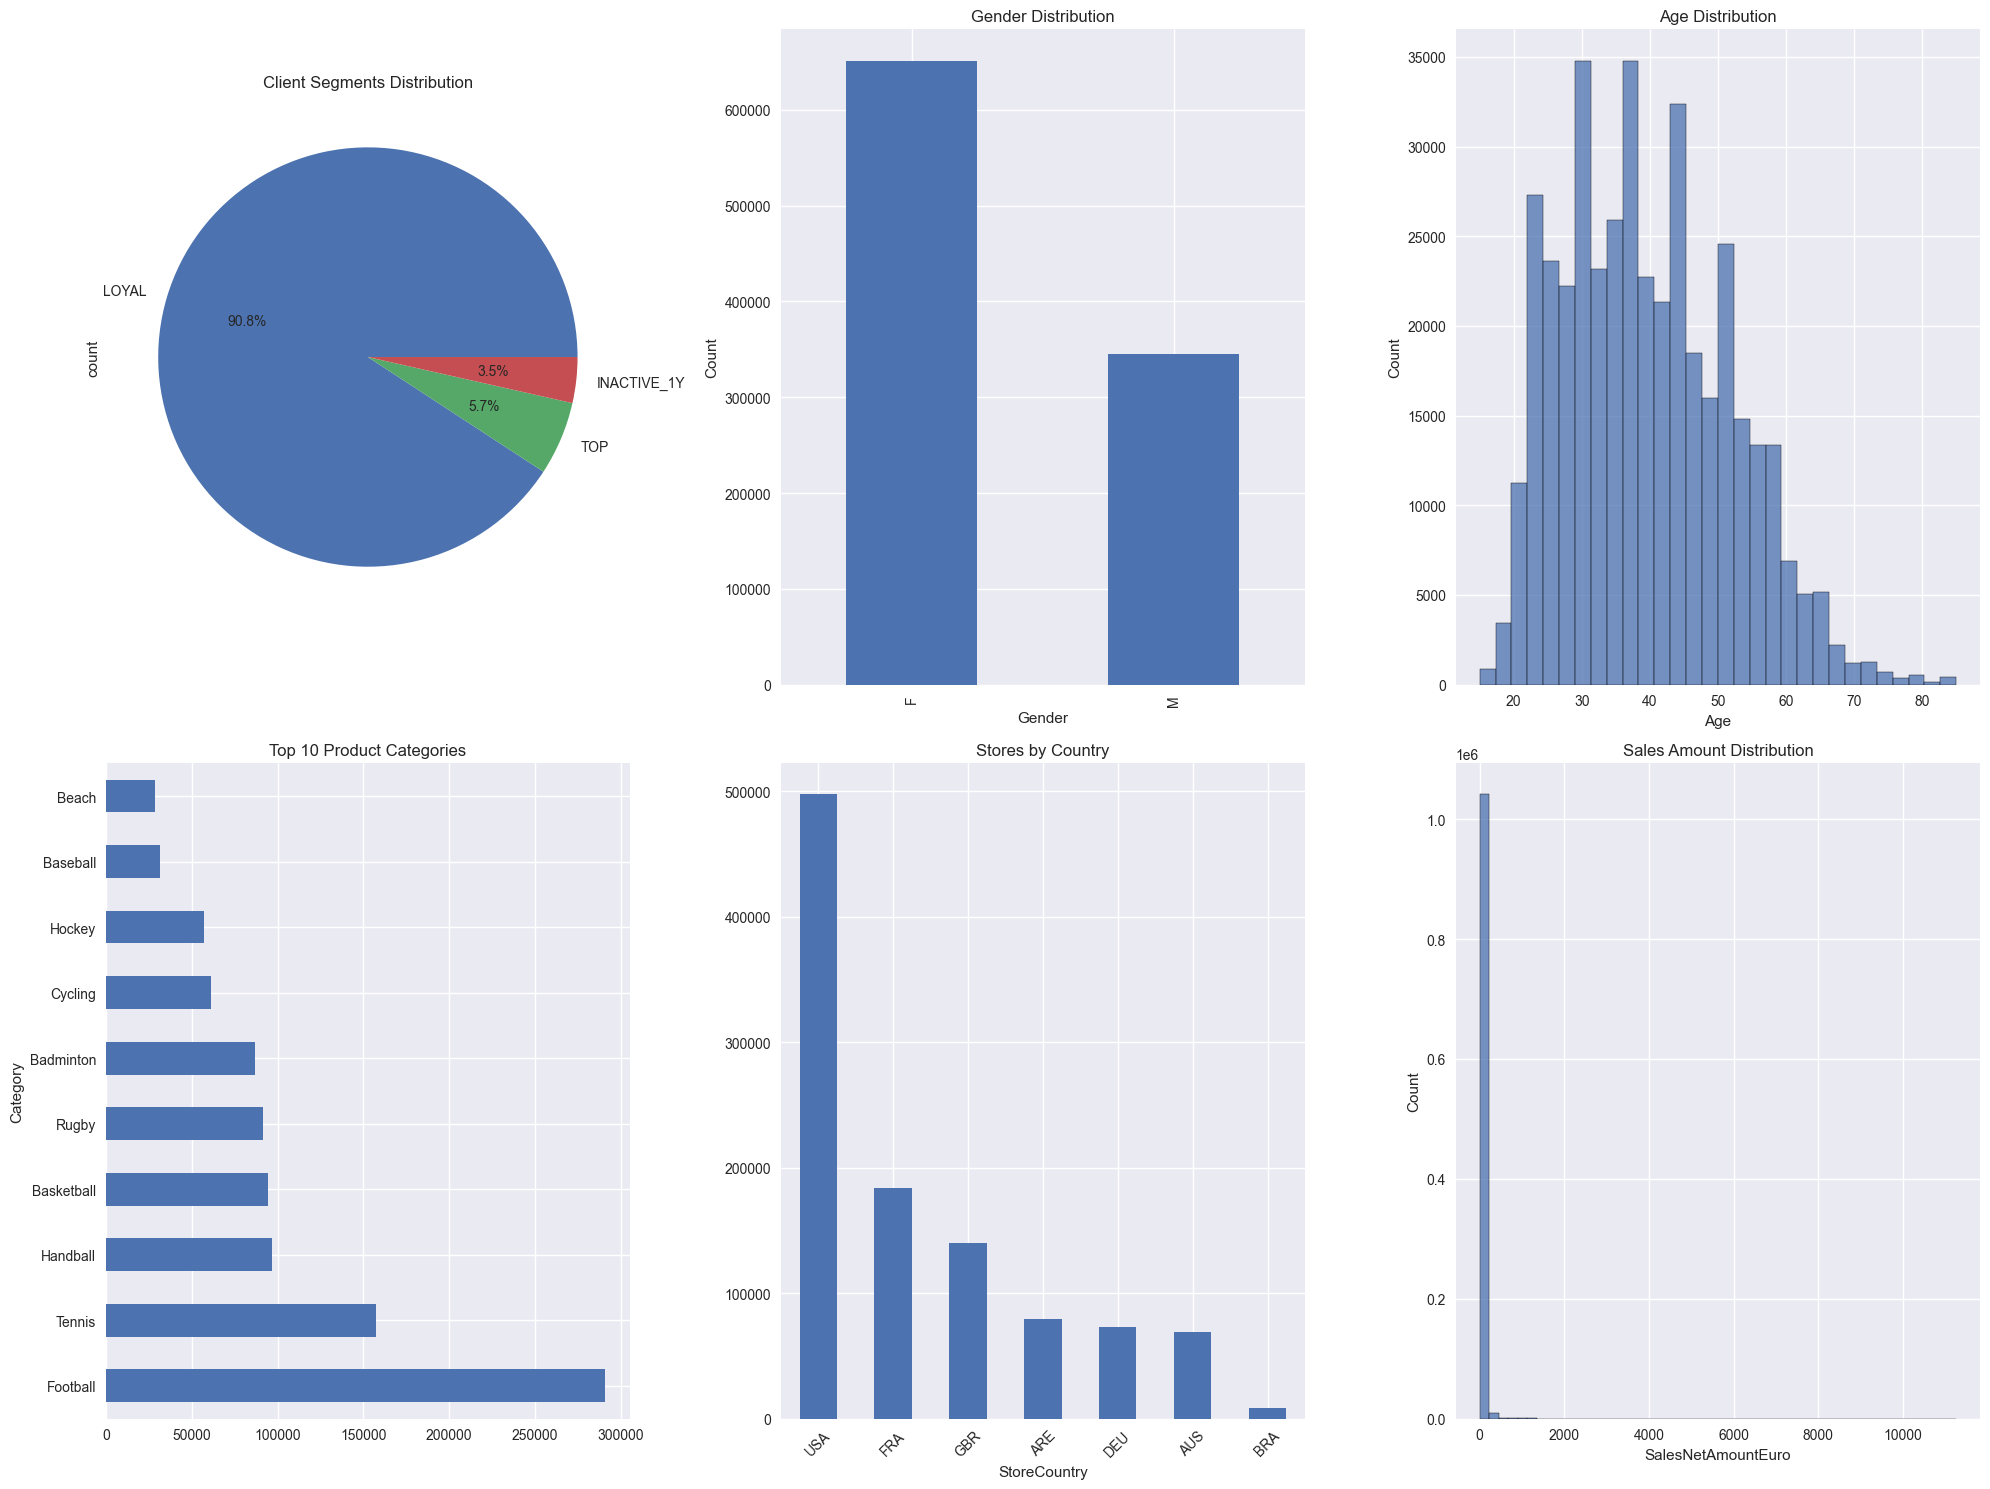

In [ ]:
# Create a figure with subplots
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 15))

# 1. Client Segments Distribution
plt.subplot(2, 3, 1)
final_df['ClientSegment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Client Segments Distribution')

# 2. Gender Distribution
plt.subplot(2, 3, 2)
final_df['ClientGender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. Age Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=final_df, x='Age', bins=30)
plt.title('Age Distribution')

# 4. Top 10 Product Categories
plt.subplot(2, 3, 4)
final_df['Category'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Product Categories')

# 5. Store Distribution by Country
plt.subplot(2, 3, 5)
final_df['StoreCountry'].value_counts().plot(kind='bar')
plt.title('Stores by Country')
plt.xticks(rotation=45)

# 6. Sales Amount Distribution
plt.subplot(2, 3, 6)
sns.histplot(data=final_df, x='SalesNetAmountEuro', bins=50)
plt.title('Sales Amount Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# Sort the final_df by SalesNetAmountEuro in descending order and select the top 30 transactions
top_30_transactions = final_df.sort_values(by='SalesNetAmountEuro', ascending=False).head(30)

# Display the top 30 transactions
display(top_30_transactions)

,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity_sold,SalesNetAmountEuro,TransactionDate,StoreCountry,Quantity_in_stock,Category,FamilyLevel1,FamilyLevel2,Universe,ClientSegment,ClientGender,Age,Weekday,AgeGroup
320933,4264182158262710054,9192259579889457140,2023-02-11 00:00:00+00:00,7215875119995113089,3,11255.98,2023-02-11 00:00:00+00:00,AUS,0.0,Golf,Clubs,Titleist T100 Irons,Men,TOP,F,36.0,Saturday,30-40
719817,5771671666918108858,7305180551405444547,2023-04-07 00:00:00+00:00,1450109522794525790,2,6506.99,2023-04-07 00:00:00+00:00,FRA,0.0,Golf,Shoes,Nike Air Zoom Infinity Tour,Women,TOP,F,73.0,Friday,60+
749567,2060269659425705239,1897950276322640154,2024-11-23 00:00:00+00:00,3257665102893537753,4,3032.97,2024-11-23 00:00:00+00:00,AUS,0.0,Running,T-shirt,Under Armour Tech,Women,TOP,F,33.0,Saturday,30-40
752404,9212747285857735928,4887346284700001358,2025-02-10 00:00:00+00:00,1672441090591814031,2,2999.99,2025-02-10 00:00:00+00:00,USA,0.0,Golf,Clubs,Titleist T100 Irons,Men,TOP,F,54.0,Monday,50-60
1093024,7460241696721725749,8856419368699931443,2024-11-02 00:00:00+00:00,3257665102893537753,3,2797.98,2024-11-02 00:00:00+00:00,AUS,0.0,Golf,Cap,Titleist Tour Performance,Women,TOP,F,46.0,Saturday,40-50
689669,8264041983437492925,8509219776337476679,2024-03-27 00:00:00+00:00,4320774246037820649,4,2588.97,2024-03-27 00:00:00+00:00,USA,0.0,Handball,Shoes,Mizuno Wave Mirage,Men,TOP,M,40.0,Wednesday,40-50
741537,4269483337333405585,8076516736512090818,2023-08-14 00:00:00+00:00,1830528581717228341,3,2573.98,2023-08-14 00:00:00+00:00,GBR,0.0,Handball,Shoes,Asics Gel-Blast,Men,LOYAL,F,52.0,Monday,50-60
31104,1560704714534816029,955101740807623655,2024-10-09 00:00:00+00:00,8616445013777361432,4,2429.97,2024-10-09 00:00:00+00:00,USA,0.0,Running,Shorts,Nike Flex Stride,Men,TOP,F,65.0,Wednesday,60+
355985,237986745621423684,9218250303616614065,2023-04-28 00:00:00+00:00,7704230050291051317,5,2387.96,2023-04-28 00:00:00+00:00,GBR,0.0,Handball,Shoes,Asics Gel-Blast,Women,LOYAL,F,60.0,Friday,60+
532272,4669011455945143385,5780782581369999447,2023-02-16 00:00:00+00:00,5792828652092282432,3,2287.98,2023-02-16 00:00:00+00:00,USA,0.0,Golf,Clubs,Callaway JAWS MD5 Wedges,Men,TOP,F,54.0,Thursday,50-60


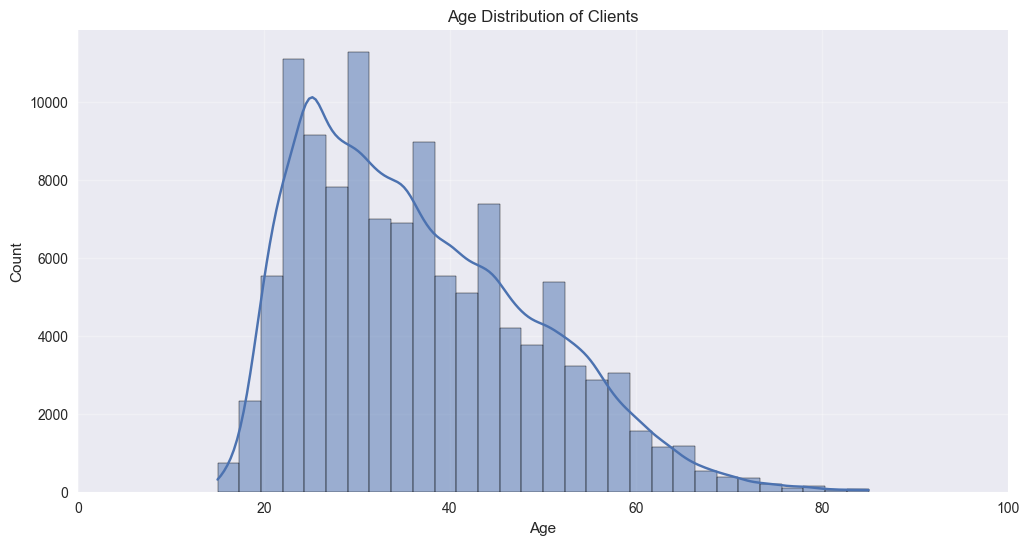

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create a histogram with KDE
sns.histplot(data=clients_df, x='Age', bins=30, kde=True)

# Customize the plot
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Count')

# Remove invalid ages (negative values and unreasonable high values)
plt.xlim(0, 100)

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.show()

In [ ]:
# Check missing values in final_df as percentages
missing_values = (final_df.isnull().sum() / len(final_df) * 100).round(2)
print("Missing values in final_df (%):")
print(missing_values)


Missing values in final_df (%):
ClientID                0.00
ProductID               0.00
SaleTransactionDate     0.00
StoreID                 0.00
Quantity_sold           0.00
SalesNetAmountEuro      0.00
TransactionDate         0.00
StoreCountry            0.00
Quantity_in_stock       0.00
Category                0.00
FamilyLevel1            0.00
FamilyLevel2            0.00
Universe                0.00
ClientSegment           0.00
ClientGender            5.14
Age                    61.14
dtype: float64


C:\Users\rikyr\AppData\Local\Temp\ipykernel_45460\213795224.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sales_by_month = final_df.groupby(final_df['TransactionDate'].dt.to_period('M'))['SalesNetAmountEuro'].sum()


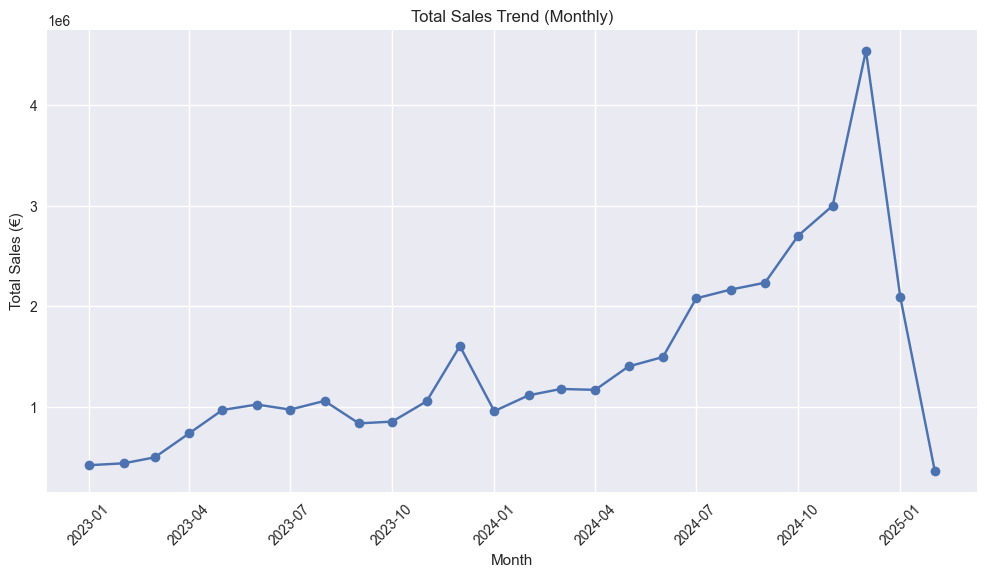

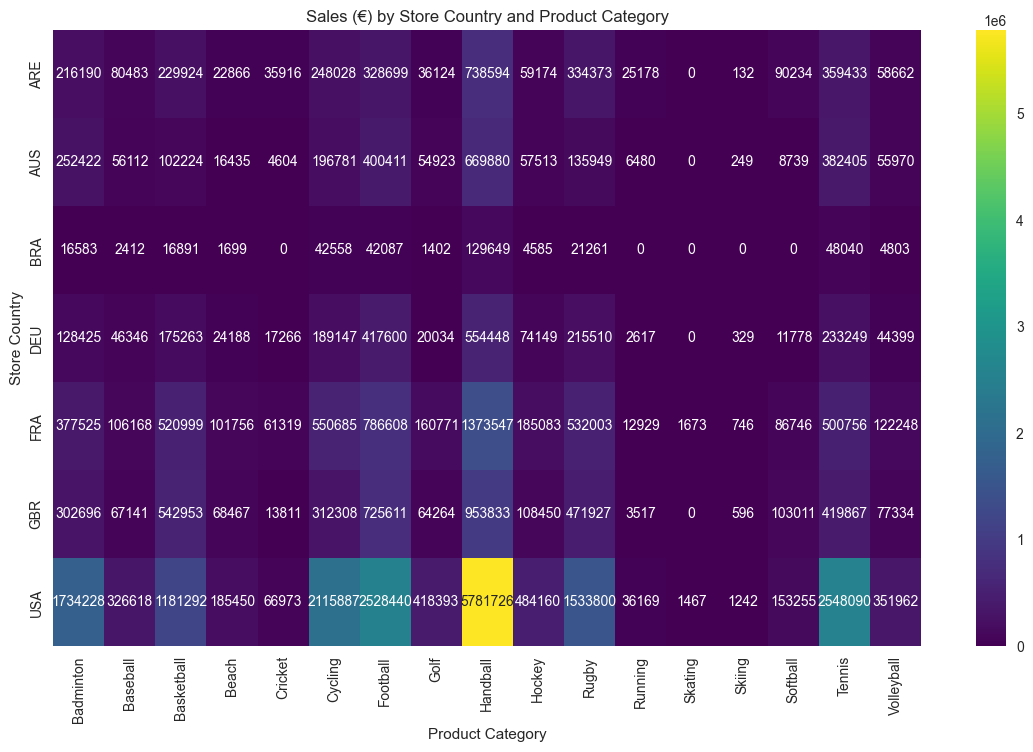

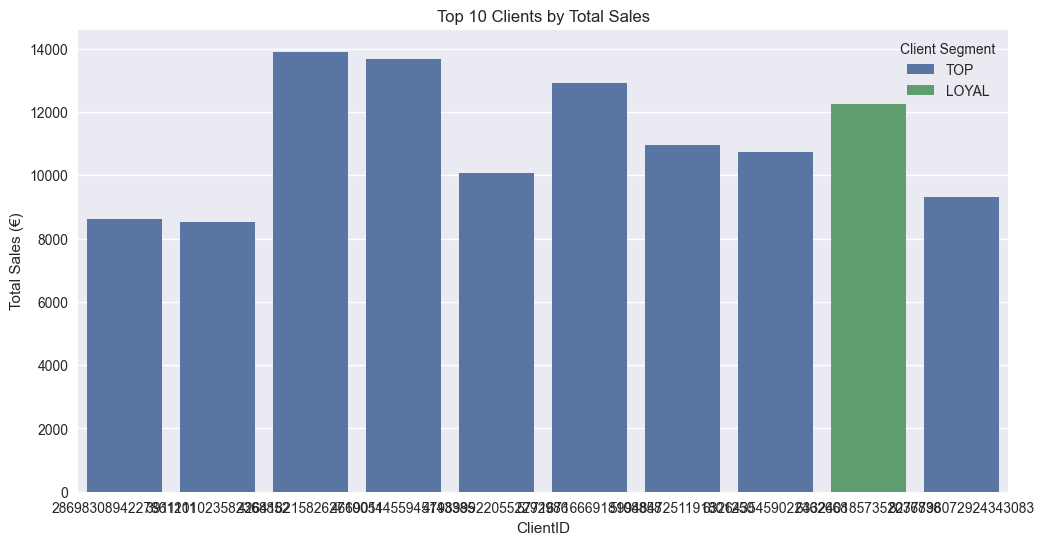

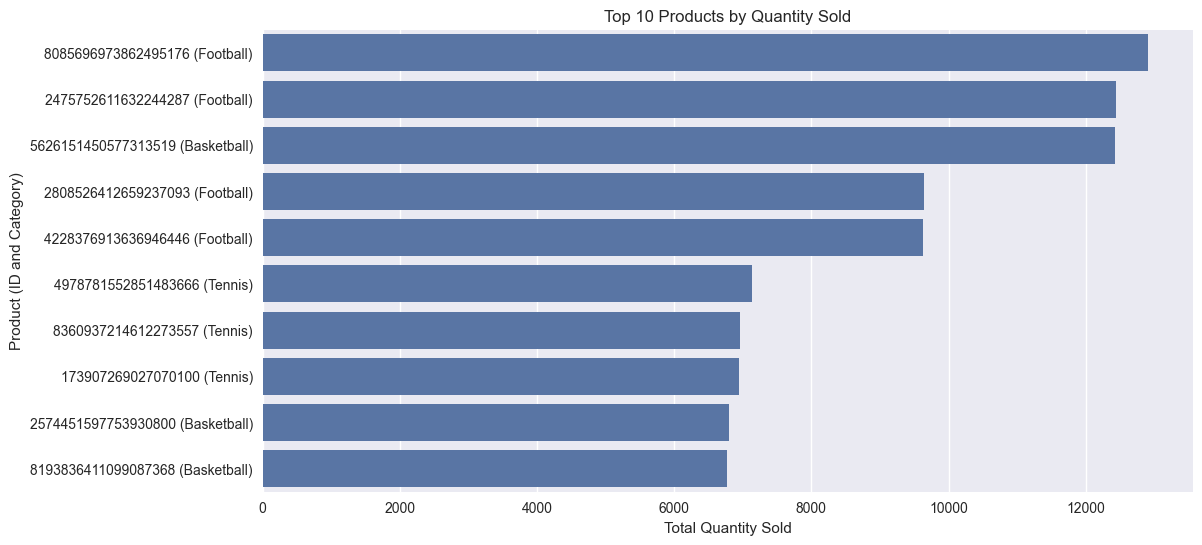

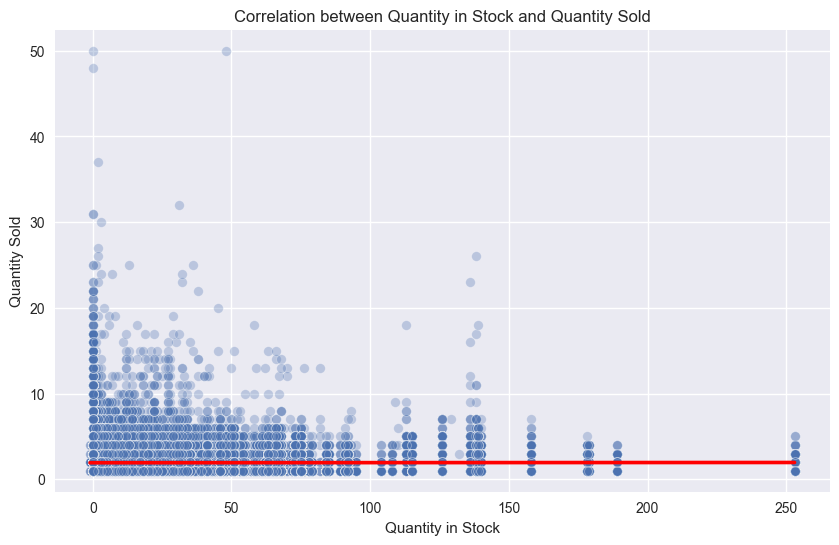

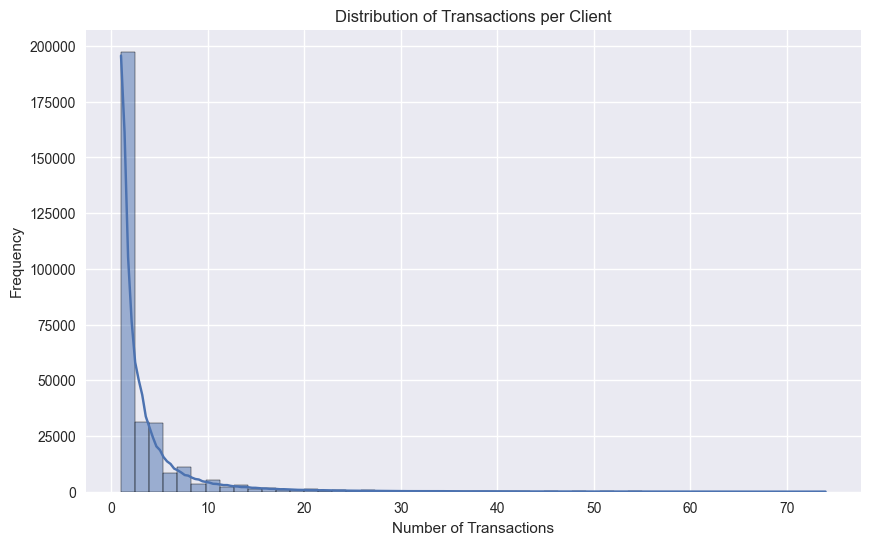

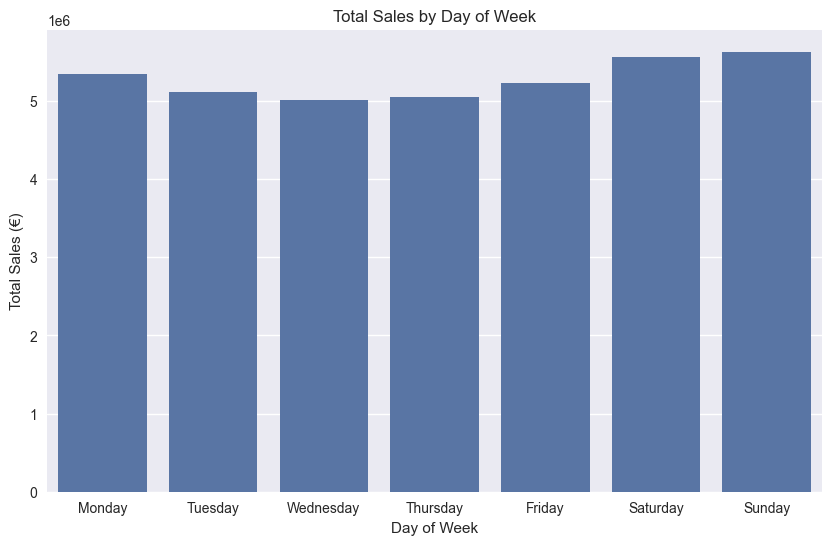

C:\Users\rikyr\AppData\Local\Temp\ipykernel_45460\213795224.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_agegroup = final_df.groupby('AgeGroup')['SalesNetAmountEuro'].mean()


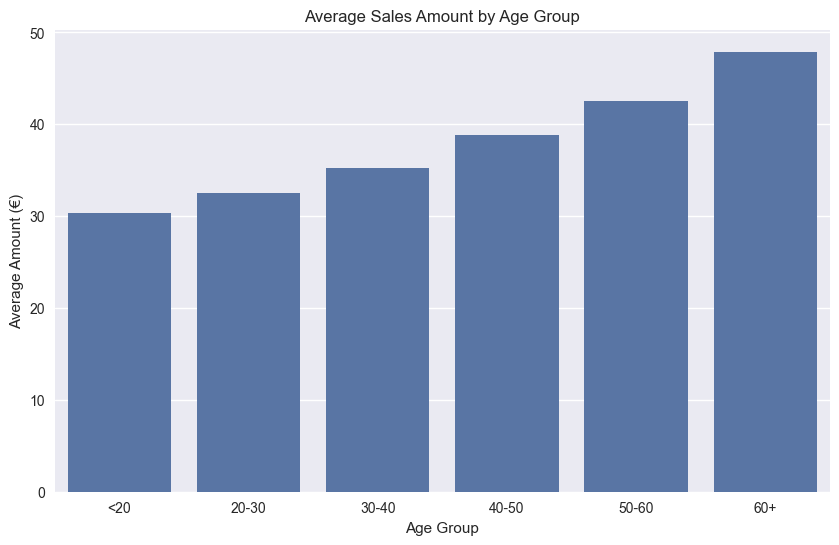

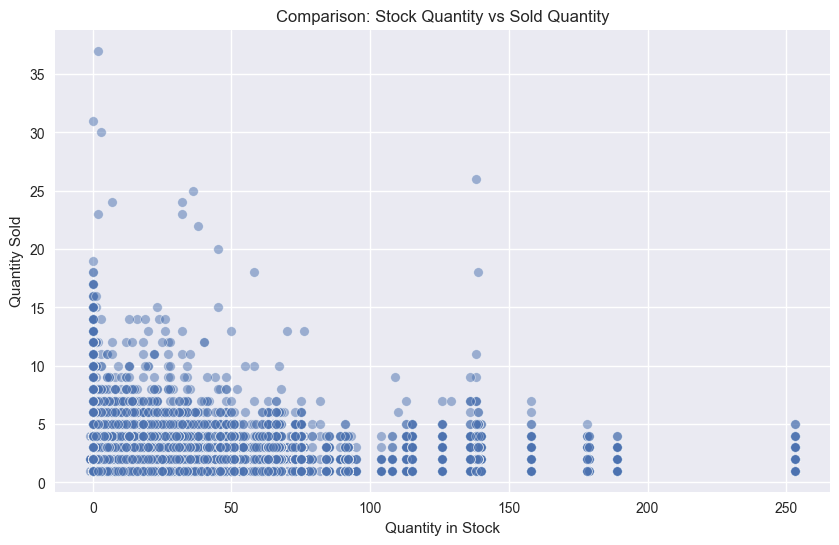

In [ ]:
plt.style.use('seaborn-v0_8')

# 2.1. Sales Trend Over Time (Monthly Aggregation)
sales_by_month = final_df.groupby(final_df['TransactionDate'].dt.to_period('M'))['SalesNetAmountEuro'].sum()
sales_by_month.index = sales_by_month.index.to_timestamp()  # convert index to timestamp
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month.index, sales_by_month.values, marker='o')
plt.title('Total Sales Trend (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales (€)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2.2. Heatmap: Sales by Store Country and Product Category
# Assuming final_df already has the StoreCountry and Category columns
heatmap_data = final_df.groupby(['StoreCountry', 'Category'])['SalesNetAmountEuro'].sum().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")
plt.title('Sales (€) by Store Country and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Store Country')
plt.show()

# 2.3. Top 10 Clients by Total Sales
client_sales = final_df.groupby('ClientID')['SalesNetAmountEuro'].sum().sort_values(ascending=False).head(10)
top_clients = client_sales.reset_index()
# If ClientSegment is in final_df use it; otherwise adjust as needed
if 'ClientSegment' in final_df.columns:
    top_clients = top_clients.merge(final_df[['ClientID','ClientSegment']].drop_duplicates(), on='ClientID', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_clients, x='ClientID', y='SalesNetAmountEuro', hue='ClientSegment')
plt.title('Top 10 Clients by Total Sales')
plt.xlabel('ClientID')
plt.ylabel('Total Sales (€)')
plt.legend(title='Client Segment')
plt.show()

# 2.4. Top 10 Products by Quantity Sold
product_sales = final_df.groupby('ProductID')['Quantity_sold'].sum().sort_values(ascending=False).head(10)
top_products = product_sales.reset_index()
# If Category exists in final_df use it; otherwise adjust as needed
if 'Category' in final_df.columns:
    top_products = top_products.merge(final_df[['ProductID','Category']].drop_duplicates(), on='ProductID', how='left')
top_products['Label'] = top_products['ProductID'].astype(str) + ' (' + top_products['Category'] + ')'
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity_sold', y='Label', orient='h')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product (ID and Category)')
plt.show()

# 2.5. Correlation between Quantity Sold and Stock Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df.dropna(subset=['Quantity_in_stock']), x='Quantity_in_stock', y='Quantity_sold', alpha=0.3)
sns.regplot(data=final_df.dropna(subset=['Quantity_in_stock']), x='Quantity_in_stock', y='Quantity_sold', scatter=False, color='red')
plt.title('Correlation between Quantity in Stock and Quantity Sold')
plt.xlabel('Quantity in Stock')
plt.ylabel('Quantity Sold')
plt.show()

# 2.6. Distribution of Transactions per Client
transactions_per_client = final_df.groupby('ClientID').size()
plt.figure(figsize=(10, 6))
sns.histplot(transactions_per_client, bins=50, kde=True)
plt.title('Distribution of Transactions per Client')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

# 2.7. Total Sales by Day of Week
if 'Weekday' not in final_df.columns:
    final_df['Weekday'] = final_df['TransactionDate'].dt.day_name()
sales_by_weekday = final_df.groupby('Weekday')['SalesNetAmountEuro'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_weekday = sales_by_weekday.reindex(weekday_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales (€)')
plt.show()

# 2.8. Average Sales by Client Age Group
if 'Age' in final_df.columns:
    bins = [0, 20, 30, 40, 50, 60, 100]
    labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
    final_df = final_df.dropna(subset=['Age']).copy()
    final_df['AgeGroup'] = pd.cut(final_df['Age'], bins=bins, labels=labels, right=False)
    avg_sales_agegroup = final_df.groupby('AgeGroup')['SalesNetAmountEuro'].mean()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_sales_agegroup.index, y=avg_sales_agegroup.values)
    plt.title('Average Sales Amount by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Average Amount (€)')
    plt.show()

# 2.9. Comparison between Stock Quantity and Quantity Sold
# Using data from final_df which already has both Quantity_sold and Quantity_in_stock
stock_sales = final_df[['ProductID', 'Quantity_sold', 'Quantity_in_stock']].dropna()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stock_sales, x='Quantity_in_stock', y='Quantity_sold', alpha=0.5)
plt.title('Comparison: Stock Quantity vs Sold Quantity')
plt.xlabel('Quantity in Stock')
plt.ylabel('Quantity Sold')
plt.show()


,ClientID,Number of Transactions,ClientSegment
0,6724960797439552262,74,LOYAL
1,6641481878133625799,74,TOP
2,3048787911156629962,74,TOP
3,4669011455945143385,74,TOP
4,7027125653034750381,74,LOYAL
5,8362088578736914630,74,TOP
6,5701599003259529695,74,TOP
7,465474668518723457,74,TOP
8,6575177809831579389,74,LOYAL
9,7507435228947594827,74,TOP


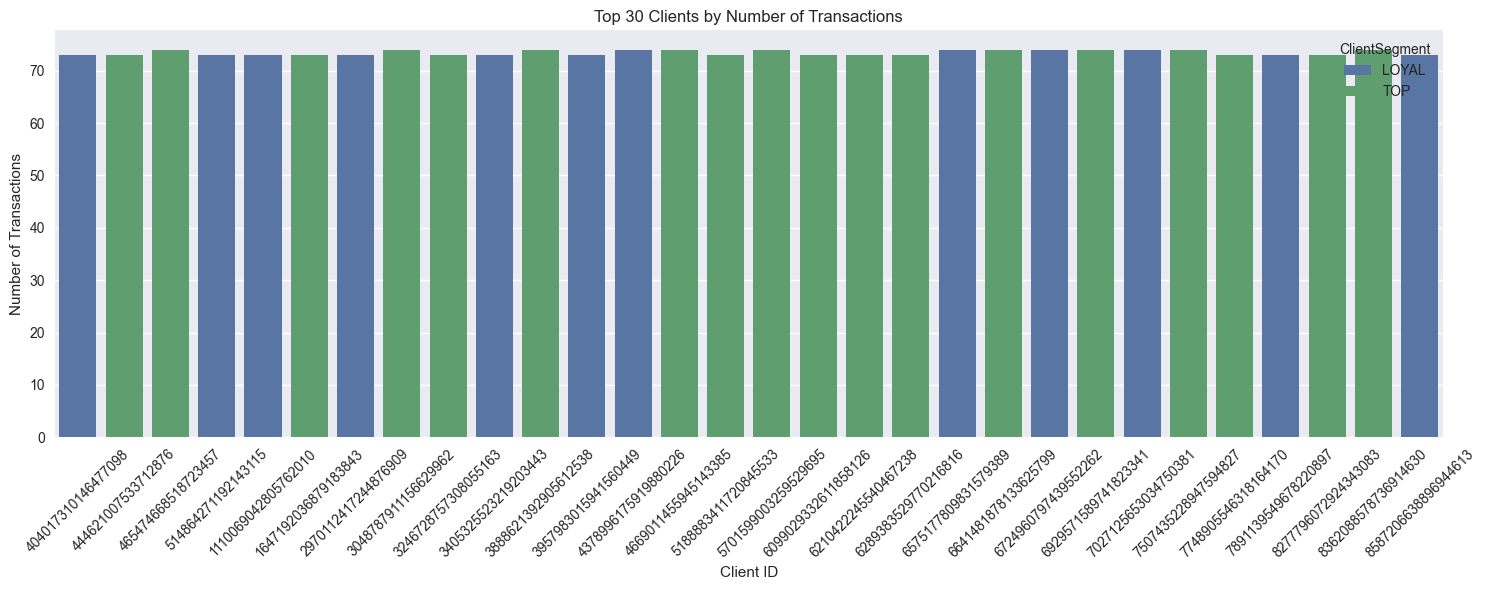

In [ ]:
# Get number of transactions per client
transactions_per_client = final_df.groupby('ClientID').size()

# Sort in descending order and get top 30
top_30_by_transactions = transactions_per_client.sort_values(ascending=False).head(30)

# Create a DataFrame with the results
top_30_clients = pd.DataFrame(top_30_by_transactions).reset_index()
top_30_clients.columns = ['ClientID', 'Number of Transactions']

# Since final_df already contains ClientSegment, we can merge directly
top_30_clients = top_30_clients.merge(final_df[['ClientID', 'ClientSegment']].drop_duplicates(), on='ClientID', how='left')

# Display results
display(top_30_clients)

# Create bar plot
plt.figure(figsize=(15, 6))
sns.barplot(data=top_30_clients, x='ClientID', y='Number of Transactions', hue='ClientSegment')
plt.title('Top 30 Clients by Number of Transactions')
plt.xticks(rotation=45)
plt.xlabel('Client ID')
plt.tight_layout()
plt.show()

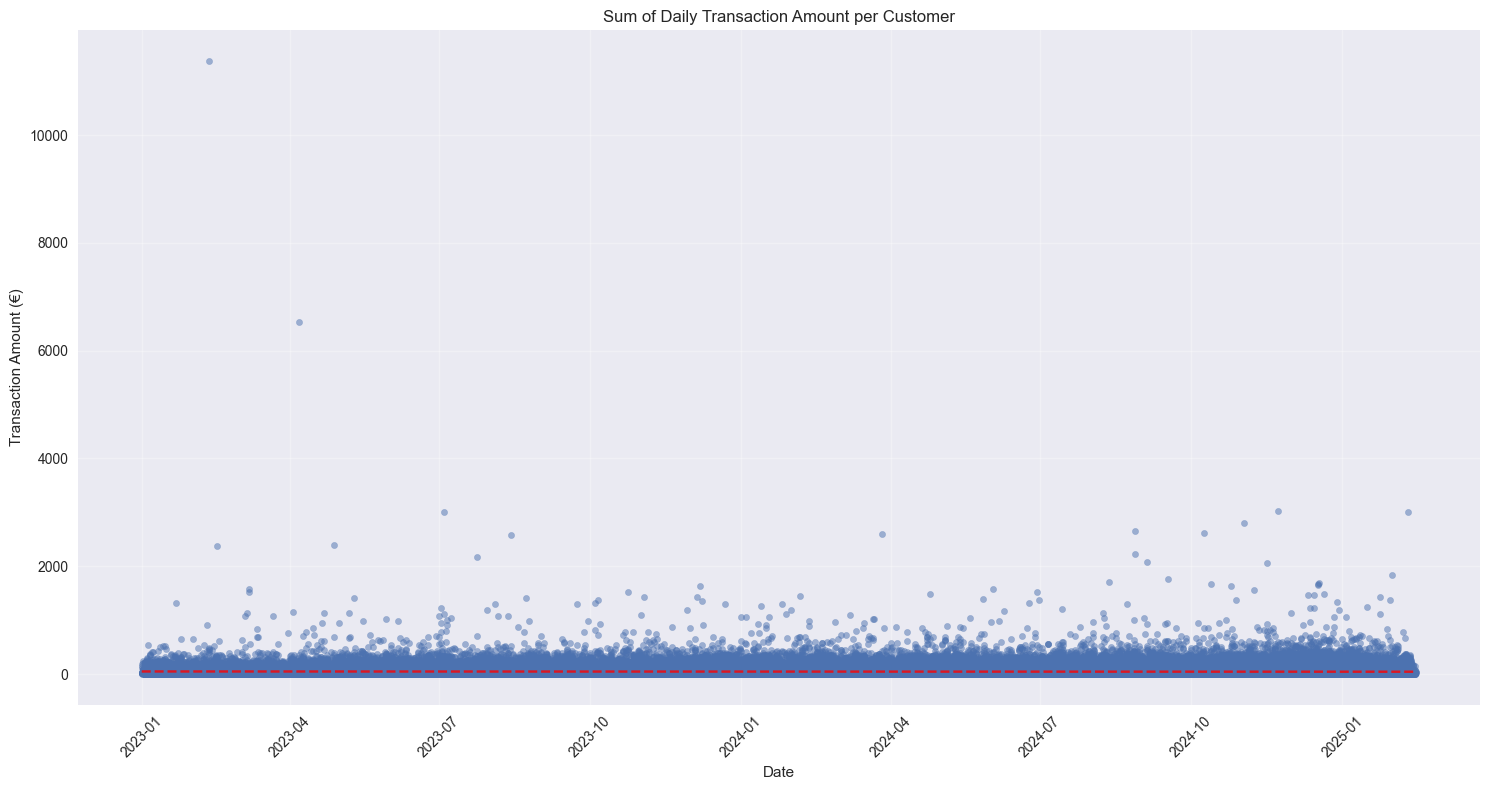

In [ ]:
# Group by date and customer, find the sum of transaction amounts for each day per customer
daily_customer_sum = final_df.groupby(['TransactionDate', 'ClientID'])['SalesNetAmountEuro'].sum().reset_index()

# Create figure
plt.figure(figsize=(15, 8))

# Create scatter plot
plt.scatter(daily_customer_sum['TransactionDate'], 
            daily_customer_sum['SalesNetAmountEuro'],
            alpha=0.5,
            s=20)

# Customize the plot
plt.title('Sum of Daily Transaction Amount per Customer')
plt.xlabel('Date')
plt.ylabel('Transaction Amount (€)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add a trend line
z = np.polyfit(daily_customer_sum['TransactionDate'].astype(np.int64), 
               daily_customer_sum['SalesNetAmountEuro'], 1)
p = np.poly1d(z)
plt.plot(daily_customer_sum['TransactionDate'],
         p(daily_customer_sum['TransactionDate'].astype(np.int64)),
         "r--", alpha=0.8)

plt.tight_layout()
plt.show()


In [ ]:
# Create a table of transactions per customer with their total amount spent
customer_total = final_df.groupby('ClientID').agg({
    'SalesNetAmountEuro': 'sum',
    'Quantity_sold': 'sum'
}).sort_values('SalesNetAmountEuro', ascending=False)

# Display top 20 customers by total amount spent
display(customer_total.head(20))

,SalesNetAmountEuro,Quantity_sold
ClientID,,
4264182158262710054,13901.31,90
4669011455945143385,13661.04,135
5771671666918108858,12920.37,92
6332401857352036838,12238.87,156
8277796072924343083,9314.94,151
3911101023582368852,8525.19,125
9212747285857735928,7968.45,78
1233639079843052214,7502.24,132
1276647054684578213,6878.37,89
